In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('drive', force_remount=True)

Mounted at drive


In [ ]:
!ls '/content/drive/MyDrive/search/lyrics-data.csv'

/content/drive/MyDrive/search/lyrics-data.csv


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/search/lyrics-data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209522 entries, 0 to 209521
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ALink   209522 non-null  object
 1   SName   209522 non-null  object
 2   SLink   209522 non-null  object
 3   Lyric   209484 non-null  object
 4   Idiom   206375 non-null  object
dtypes: object(5)
memory usage: 8.0+ MB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df[50:75]

,author,song_name,lyric,Idiom
50,/10000-maniacs/,Dust Bowl,I should know to leave them home. They follow ...,ENGLISH
51,/10000-maniacs/,Eat For Two,"Oh,. Baby blankets and. Baby shoes,. Baby slip...",ENGLISH
52,/10000-maniacs/,Eden,"We are the roses in the garden,. beauty with t...",ENGLISH
53,/10000-maniacs/,Ellen,Eager to please was just the way that he was. ...,ENGLISH
54,/10000-maniacs/,Even With My Eyes Closed,"Even with my eyes closed,. Funny how I know. i...",ENGLISH
55,/10000-maniacs/,Everyday Is Like Sunday,Trudging slowly over wet sand. Back to the ben...,ENGLISH
56,/10000-maniacs/,Everyone A Puzzle Lover,why are some men born. with minds that earn de...,ENGLISH
57,/10000-maniacs/,Few And Far Between,"Times are far between,. and few I bet,. when w...",ENGLISH
58,/10000-maniacs/,From The Time We Say Goodbye,by the time you say goodbye. by the time you s...,ENGLISH
59,/10000-maniacs/,Girl On A Train,"Waking on a train dreaming, charmed alone they...",ENGLISH


In [ ]:
df.drop(labels=['SLink'], axis=1, inplace=True)

In [ ]:
df.rename(columns={'ALink':'author', 'SName':'song_name', 'Lyric':'lyric'}, inplace=True)

In [ ]:
df

,author,song_name,lyric,Idiom
0,/10000-maniacs/,More Than This,I could feel at the time. There was no way of ...,ENGLISH
1,/10000-maniacs/,Because The Night,"Take me now, baby, here as I am. Hold me close...",ENGLISH
2,/10000-maniacs/,These Are Days,These are. These are days you'll remember. Nev...,ENGLISH
3,/10000-maniacs/,A Campfire Song,"A lie to say, ""O my mountain has coal veins an...",ENGLISH
4,/10000-maniacs/,Everyday Is Like Sunday,Trudging slowly over wet sand. Back to the ben...,ENGLISH
...,...,...,...,...
209517,/zeca-pagodinho/,Vou Botar Teu Nome Na Macumba,Eu vou botar teu nome na macumba. Vou procurar...,PORTUGUESE
209518,/zeca-pagodinho/,Vou Procurar Esquecer,Vou procurar um novo amor na minha vida. Porqu...,PORTUGUESE
209519,/zeca-pagodinho/,Vou Ver Juliana,Quando a mare vazá. Vou vê juliana. Vou vê jul...,PORTUGUESE
209520,/zeca-pagodinho/,Yaô Cadê A Samba / Outro Recado / Hino,"Ô Yaô. Yaô, cadê a samba?. Está mangando na cu...",PORTUGUESE


In [ ]:
import re
from nltk.stem.snowball import SnowballStemmer

def cell_to_lower(cell):
    return cell.lower()

def prepare_author_cell(cell):
    return str(cell).strip('/').replace('-', ' ').title()

def prepare_text_cell(cell):
    cell = re.sub(r'\s+', ' ', str(cell))
    cell = re.sub(r'[^\w+\s]', '', cell).lower()
    return cell

languages = (
        # "arabic", cтеммер крашится на каком-то арабском слове
        "danish",
        "dutch",
        "english",
        "finnish",
        "french",
        "german",
        "hungarian",
        "italian",
        "norwegian",
        "porter",
        "portuguese",
        "romanian",
        "russian",
        "spanish",
        "swedish",
    ) # взял отсюда https://www.nltk.org/_modules/nltk/stem/snowball.html
def stemming(language_and_cell):
    language = language_and_cell[0] 
    cell = language_and_cell[1]
    if language in languages:
        stemmer = SnowballStemmer(language=language)
        return ' '.join([stemmer.stem(word) for word in cell.split()])
    return cell

In [ ]:
stemming(('english', 'writed wrote written'))

'write wrote written'

Мне нужен список кортежей, чтобы пройтись стеммером по тексту песни, зная язык, для этого воспользуюсь zip

In [ ]:
print(np.array(list(zip(np.array(df[df.columns[:2]])))).reshape(206375, 2))

[['/10000-maniacs/' 'More Than This']
 ['/10000-maniacs/' 'Because The Night']
 ['/10000-maniacs/' 'These Are Days']
 ...
 ['/zeca-pagodinho/' 'Vou Ver Juliana']
 ['/zeca-pagodinho/' 'Yaô Cadê A Samba / Outro Recado / Hino']
 ['/zeca-pagodinho/' 'Zeca, Cadê Você?']]


In [ ]:
df[df.columns[:2]]

,author,song_name
0,/10000-maniacs/,More Than This
1,/10000-maniacs/,Because The Night
2,/10000-maniacs/,These Are Days
3,/10000-maniacs/,A Campfire Song
4,/10000-maniacs/,Everyday Is Like Sunday
...,...,...
209517,/zeca-pagodinho/,Vou Botar Teu Nome Na Macumba
209518,/zeca-pagodinho/,Vou Procurar Esquecer
209519,/zeca-pagodinho/,Vou Ver Juliana
209520,/zeca-pagodinho/,Yaô Cadê A Samba / Outro Recado / Hino


In [ ]:
df.lyric[70]

'Music by 10,000 Maniacs - Lyrics by Mary Ramsey & John Lombardo. I see the leaves of autumn. changing, falling , turning what was green. I see a door standing open,. open to curiosity. we could be together. tear it all apart. would you ever notice. what was hidden in my heart. heartstrong. do we ever listen. closely as willows start to weep. there as we stood upon the threshold. who said forever was for keeps?. would you ever notice what. was hidden in my heart,. my deep heart is reeling forward. and steady on to keep,. who made me miss the last ferry?. who made this river so deep?. .'

In [ ]:
prepare_text_cell(df.lyric[70])

'music by 10000 maniacs  lyrics by mary ramsey  john lombardo i see the leaves of autumn changing falling  turning what was green i see a door standing open open to curiosity we could be together tear it all apart would you ever notice what was hidden in my heart heartstrong do we ever listen closely as willows start to weep there as we stood upon the threshold who said forever was for keeps would you ever notice what was hidden in my heart my deep heart is reeling forward and steady on to keep who made me miss the last ferry who made this river so deep '

Появились лишние пробелы, но это ок, с ними справится split() при токенизации

In [ ]:
df

,author,song_name,lyric,Idiom
0,/10000-maniacs/,More Than This,I could feel at the time. There was no way of ...,ENGLISH
1,/10000-maniacs/,Because The Night,"Take me now, baby, here as I am. Hold me close...",ENGLISH
2,/10000-maniacs/,These Are Days,These are. These are days you'll remember. Nev...,ENGLISH
3,/10000-maniacs/,A Campfire Song,"A lie to say, ""O my mountain has coal veins an...",ENGLISH
4,/10000-maniacs/,Everyday Is Like Sunday,Trudging slowly over wet sand. Back to the ben...,ENGLISH
...,...,...,...,...
209517,/zeca-pagodinho/,Vou Botar Teu Nome Na Macumba,Eu vou botar teu nome na macumba. Vou procurar...,PORTUGUESE
209518,/zeca-pagodinho/,Vou Procurar Esquecer,Vou procurar um novo amor na minha vida. Porqu...,PORTUGUESE
209519,/zeca-pagodinho/,Vou Ver Juliana,Quando a mare vazá. Vou vê juliana. Vou vê jul...,PORTUGUESE
209520,/zeca-pagodinho/,Yaô Cadê A Samba / Outro Recado / Hino,"Ô Yaô. Yaô, cadê a samba?. Está mangando na cu...",PORTUGUESE


In [ ]:
def prepare_columns(df):
    with mp.Pool(8) as pool:
        df['author'] = pool.map(prepare_author_cell, df.author)
        for column in ['song_name', 'lyric']:
            df['hidden_'+column] = pool.map(prepare_text_cell, df[column])
        df['displayed_title'] = df.author + ' — ' + df.song_name
        df['hidden_title'] = pool.map(cell_to_lower, df.author)
        df['hidden_title'] += ' ' + df.hidden_song_name
        df.drop(labels=['author', 'song_name', 'hidden_song_name'], axis=1, inplace=True)
        df.rename(columns={'lyric':'display_lyric'}, inplace=True)
        df.Idiom = pool.map(cell_to_lower, df.Idiom)
        df.hidden_lyric = pool.map(stemming, np.array(list(zip(np.array(df[['Idiom', 'hidden_lyric']])))).reshape(206375, 2))

In [ ]:
%%timeit -n 1 -r 1
prepare_columns(df)

1 loop, best of 1: 15min 6s per loop


In [ ]:
df.to_csv('/content/drive/MyDrive/search/df.csv', index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/search/df.csv')

In [ ]:
df.Idiom.value_counts()

english           114723
portuguese         85085
spanish             4812
italian              626
french               471
german               314
kinyarwanda           88
icelandic             47
swedish               27
finnish               24
indonesian            17
estonian              12
galician              12
irish                  9
haitian_creole         9
danish                 9
basque                 8
norwegian              7
tagalog                7
croatian               7
catalan                6
sundanese              6
swahili                5
dutch                  5
malay                  4
russian                4
serbian                3
cebuano                2
kurdish                2
japanese               2
nyanja                 2
arabic                 2
turkish                2
sesotho                2
malagasy               2
korean                 1
welsh                  1
afrikaans              1
hungarian              1
slovak                 1


Просто воспользоваться w2vecом не получится, потому что половина песен не на английском языке 

In [ ]:
df

,display_lyric,Idiom,hidden_lyric,displayed_title,hidden_title
0,I could feel at the time. There was no way of ...,english,i could feel at the time there was no way of k...,10000 Maniacs — More Than This,10000 maniacs more than this
1,"Take me now, baby, here as I am. Hold me close...",english,take me now babi here as i am hold me close an...,10000 Maniacs — Because The Night,10000 maniacs because the night
2,These are. These are days you'll remember. Nev...,english,these are these are day youll rememb never bef...,10000 Maniacs — These Are Days,10000 maniacs these are days
3,"A lie to say, ""O my mountain has coal veins an...",english,a lie to say o my mountain has coal vein and b...,10000 Maniacs — A Campfire Song,10000 maniacs a campfire song
4,Trudging slowly over wet sand. Back to the ben...,english,trudg slowli over wet sand back to the bench w...,10000 Maniacs — Everyday Is Like Sunday,10000 maniacs everyday is like sunday
...,...,...,...,...,...
206370,Eu vou botar teu nome na macumba. Vou procurar...,portuguese,eu vou bot teu nom na macumb vou procur uma fe...,Zeca Pagodinho — Vou Botar Teu Nome Na Macumba,zeca pagodinho vou botar teu nome na macumba
206371,Vou procurar um novo amor na minha vida. Porqu...,portuguese,vou procur um nov amor na minh vid porqu nã po...,Zeca Pagodinho — Vou Procurar Esquecer,zeca pagodinho vou procurar esquecer
206372,Quando a mare vazá. Vou vê juliana. Vou vê jul...,portuguese,quand a mar vaz vou vê julian vou vê julian ê ...,Zeca Pagodinho — Vou Ver Juliana,zeca pagodinho vou ver juliana
206373,"Ô Yaô. Yaô, cadê a samba?. Está mangando na cu...",portuguese,ô yaô yaô cad a samb está mang na curimb está ...,Zeca Pagodinho — Yaô Cadê A Samba / Outro Reca...,zeca pagodinho yaô cadê a samba outro recado ...


display lyric - будет выдаваться пользователю

display title - будет выдаваться пользователю

hidden lyric - текст песен как мешок слов, к которому применили стемминг

hidden title - заголовок как мешок слов

In [ ]:
df.drop('Idiom', axis=1, inplace=True)

случайно удалил колонку, сейчас верну

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/search/df.csv')

In [ ]:
df

,display_lyric,Idiom,hidden_lyric,displayed_title,hidden_title
0,I could feel at the time. There was no way of ...,english,i could feel at the time there was no way of k...,10000 Maniacs — More Than This,10000 maniacs more than this
1,"Take me now, baby, here as I am. Hold me close...",english,take me now babi here as i am hold me close an...,10000 Maniacs — Because The Night,10000 maniacs because the night
2,These are. These are days you'll remember. Nev...,english,these are these are day youll rememb never bef...,10000 Maniacs — These Are Days,10000 maniacs these are days
3,"A lie to say, ""O my mountain has coal veins an...",english,a lie to say o my mountain has coal vein and b...,10000 Maniacs — A Campfire Song,10000 maniacs a campfire song
4,Trudging slowly over wet sand. Back to the ben...,english,trudg slowli over wet sand back to the bench w...,10000 Maniacs — Everyday Is Like Sunday,10000 maniacs everyday is like sunday
...,...,...,...,...,...
206370,Eu vou botar teu nome na macumba. Vou procurar...,portuguese,eu vou bot teu nom na macumb vou procur uma fe...,Zeca Pagodinho — Vou Botar Teu Nome Na Macumba,zeca pagodinho vou botar teu nome na macumba
206371,Vou procurar um novo amor na minha vida. Porqu...,portuguese,vou procur um nov amor na minh vid porqu nã po...,Zeca Pagodinho — Vou Procurar Esquecer,zeca pagodinho vou procurar esquecer
206372,Quando a mare vazá. Vou vê juliana. Vou vê jul...,portuguese,quand a mar vaz vou vê julian vou vê julian ê ...,Zeca Pagodinho — Vou Ver Juliana,zeca pagodinho vou ver juliana
206373,"Ô Yaô. Yaô, cadê a samba?. Está mangando na cu...",portuguese,ô yaô yaô cad a samb está mang na curimb está ...,Zeca Pagodinho — Yaô Cadê A Samba / Outro Reca...,zeca pagodinho yaô cadê a samba outro recado ...


In [ ]:
class Document:
    def __init__(self,
                 displayed_title,
                 displayed_lyric,
                 hidden_title,
                 hidden_lyric,
                 language,
                 tfidf_dict_title,
                 tfidf_dict_lyric):
        # можете здесь какие-нибудь свои поля подобавлять
        self.displayed_title = displayed_title
        self.displayed_lyric = displayed_lyric
        self.hidden_title = hidden_title
        self.hidden_lyric = hidden_lyric
        self.language = language
        self.tfidf_dict_title = tfidf_dict_title
        self.tfidf_dict_lyric = tfidf_dict_lyric
    
    def format(self, query):
        # возвращает пару тайтл-текст, отформатированную под запрос
        return [self.displayed_title, self.displayed_lyric + ' ...']

In [ ]:
df

,display_lyric,Idiom,hidden_lyric,displayed_title,hidden_title
0,I could feel at the time. There was no way of ...,english,i could feel at the time there was no way of k...,10000 Maniacs — More Than This,10000 maniacs more than this
1,"Take me now, baby, here as I am. Hold me close...",english,take me now babi here as i am hold me close an...,10000 Maniacs — Because The Night,10000 maniacs because the night
2,These are. These are days you'll remember. Nev...,english,these are these are day youll rememb never bef...,10000 Maniacs — These Are Days,10000 maniacs these are days
3,"A lie to say, ""O my mountain has coal veins an...",english,a lie to say o my mountain has coal vein and b...,10000 Maniacs — A Campfire Song,10000 maniacs a campfire song
4,Trudging slowly over wet sand. Back to the ben...,english,trudg slowli over wet sand back to the bench w...,10000 Maniacs — Everyday Is Like Sunday,10000 maniacs everyday is like sunday
...,...,...,...,...,...
206370,Eu vou botar teu nome na macumba. Vou procurar...,portuguese,eu vou bot teu nom na macumb vou procur uma fe...,Zeca Pagodinho — Vou Botar Teu Nome Na Macumba,zeca pagodinho vou botar teu nome na macumba
206371,Vou procurar um novo amor na minha vida. Porqu...,portuguese,vou procur um nov amor na minh vid porqu nã po...,Zeca Pagodinho — Vou Procurar Esquecer,zeca pagodinho vou procurar esquecer
206372,Quando a mare vazá. Vou vê juliana. Vou vê jul...,portuguese,quand a mar vaz vou vê julian vou vê julian ê ...,Zeca Pagodinho — Vou Ver Juliana,zeca pagodinho vou ver juliana
206373,"Ô Yaô. Yaô, cadê a samba?. Está mangando na cu...",portuguese,ô yaô yaô cad a samb está mang na curimb está ...,Zeca Pagodinho — Yaô Cadê A Samba / Outro Reca...,zeca pagodinho yaô cadê a samba outro recado ...


Данным образом, я думаю, лучше будет считать score как сумма tf-idf от каждого совпавшего слова из запроса с заголовком и сумма tf-idf от каждого совпавшего слова из запроса с текстом песни. И мне кажется, что вес каждого совпавшего слова из запроса с заголовком должен быть больше, это нужно будет проверить с помощью оценки качества ранжирования (таких метрик как (precision@k, MRR, DCG, pFound…)

Приступим к составлению tfidf словарей для каждого слова заголовка и текста песни относительно всех заголовков и всех текстов и составлению списка документов

In [ ]:
df.iloc[0, :]

display_lyric      I could feel at the time. There was no way of ...
Idiom                                                        english
hidden_lyric       i could feel at the time there was no way of k...
displayed_title                       10000 Maniacs — More Than This
hidden_title                            10000 maniacs more than this
Name: 0, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def get_ifidf_for_words_title(text):
    tfidf_matrix = tfidf_title.transform([text]).todense()
    feature_index = tfidf_matrix[0,:].nonzero()[1]
    tfidf_scores = zip([feature_names_title[i] for i in feature_index], [tfidf_matrix[0, x] for x in feature_index])
    return dict(tfidf_scores)

def get_ifidf_for_words_lyric(text):
    tfidf_matrix = tfidf_lyric.transform([text]).todense()
    feature_index = tfidf_matrix[0,:].nonzero()[1]
    tfidf_scores = zip([feature_names_lyric[i] for i in feature_index], [tfidf_matrix[0, x] for x in feature_index])
    return dict(tfidf_scores)

In [ ]:
docs = []
tfidf_title = TfidfVectorizer()
tfidf_title.fit(df.hidden_title)
feature_names_title = tfidf_title.get_feature_names()

tfidf_lyric = TfidfVectorizer()
tfidf_lyric.fit(df.hidden_lyric)
feature_names_lyric = tfidf_lyric.get_feature_names()

for i in range(len(df)):
    displayed_lyric, language, hidden_lyric, displayed_title, hidden_title = df.iloc[i, :]

    tfidf_dict_title = get_ifidf_for_words_title(hidden_title)
    tfidf_dict_lyric = get_ifidf_for_words_lyric(hidden_lyric)

    docs.append(Document(displayed_title=displayed_title,
                         displayed_lyric=displayed_lyric,
                         hidden_title=hidden_title,
                         hidden_lyric=hidden_lyric,
                         language=language,
                         tfidf_dict_title=tfidf_dict_title,
                         tfidf_dict_lyric=tfidf_dict_lyric
                         ))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
len(docs)

206375

Сохраню список документов и считаю его в build_index

In [ ]:
import pickle
with open('/content/drive/MyDrive/search/documents.pkl', 'wb') as file:
    pickle.dump(docs, file)

In [ ]:
import pickle
with open('/content/drive/MyDrive/search/documents (1).pkl', 'rb') as file:
    docs = pickle.load(file)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/search/df.csv')

Буду определять язык поискового запроса и пользоваться стеммером по каждому слову из запроса (сам поиск я веду по отстеммеренным текстам песен)

In [ ]:
pip install langdetect

     |████████████████████████████████| 981 kB 5.4 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=485e93e2da30329f1d7bb44528ad1bd2deb4d957d0b3a1b4b836e9a210b5a703
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
from langdetect import detect

detect('ывдо')

'ru'

In [ ]:
df.hidden_lyric

In [ ]:
languages_dict = {'da':"danish",
 'de':"german",
 'en':"english",
 'es':"spanish",
 'fi':"finnish",
 'fr':"french", 
'hu':"hungarian",
 'it':"italian",
 'nl':"dutch",
 'no':"norwegian", 
'pt':"portuguese",
 'ro':"romanian",
 'ru':"russian",
 'sv':"swedish"}

langdetect выдает мне язык как 2 символа, я создал словарь, который переводит их в вид, читаемый стеммером

In [ ]:
detect(df.hidden_lyric[33320])

'pt'

In [ ]:
def dcg_at_k(r, k, method=0):
    """Score is discounted cumulative gain (dcg)
    Relevance is positive real values.  Can use binary
    as the previous methods.
    Example from
    http://www.stanford.edu/class/cs276/handouts/EvaluationNew-handout-6-per.pdf
    >>> r = [3, 2, 3, 0, 0, 1, 2, 2, 3, 0]
    >>> dcg_at_k(r, 1)
    3.0
    >>> dcg_at_k(r, 1, method=1)
    3.0
    >>> dcg_at_k(r, 2)
    5.0
    >>> dcg_at_k(r, 2, method=1)
    4.2618595071429155
    >>> dcg_at_k(r, 10)
    9.6051177391888114
    >>> dcg_at_k(r, 11)
    9.6051177391888114
    Args:
        r: Relevance scores (list or numpy) in rank order
            (first element is the first item)
        k: Number of results to consider
        method: If 0 then weights are [1.0, 1.0, 0.6309, 0.5, 0.4307, ...]
                If 1 then weights are [1.0, 0.6309, 0.5, 0.4307, ...]
    Returns:
        Discounted cumulative gain
    """
    r = np.asfarray(r)[:k]
    if r.size:
        if method == 0:
            return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
        elif method == 1:
            return np.sum(r / np.log2(np.arange(2, r.size + 2)))
        else:
            raise ValueError('method must be 0 or 1.')
    return 0.


def ndcg_at_k(r, k, method=0):
    """Score is normalized discounted cumulative gain (ndcg)
    Relevance is positive real values.  Can use binary
    as the previous methods.
    Example from
    http://www.stanford.edu/class/cs276/handouts/EvaluationNew-handout-6-per.pdf
    >>> r = [3, 2, 3, 0, 0, 1, 2, 2, 3, 0]
    >>> ndcg_at_k(r, 1)
    1.0
    >>> r = [2, 1, 2, 0]
    >>> ndcg_at_k(r, 4)
    0.9203032077642922
    >>> ndcg_at_k(r, 4, method=1)
    0.96519546960144276
    >>> ndcg_at_k([0], 1)
    0.0
    >>> ndcg_at_k([1], 2)
    1.0
    Args:
        r: Relevance scores (list or numpy) in rank order
            (first element is the first item)
        k: Number of results to consider
        method: If 0 then weights are [1.0, 1.0, 0.6309, 0.5, 0.4307, ...]
                If 1 then weights are [1.0, 0.6309, 0.5, 0.4307, ...]
    Returns:
        Normalized discounted cumulative gain
    """
    dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k, method) / dcg_max

In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image
ims = []
for i in range(1, 7):
    uploaded = files.upload()
    ims.append(Image.open(BytesIO(uploaded[f'0{i}.jpg'])))

Saving 01.jpg to 01.jpg


Saving 02.jpg to 02.jpg


Saving 03.jpg to 03.jpg


Saving 04.jpg to 04.jpg


Saving 05.jpg to 05.jpg


Saving 06.jpg to 06.jpg


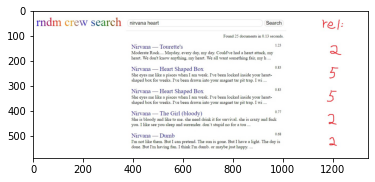

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(ims[0])
plt.show()

Извините, что плохо видно, вот тут лучше: https://drive.google.com/file/d/1qyclJpp0Y51uGIeh2SHTs8jPT6cavq59/view?usp=sharing

In [ ]:
ndcg_at_k([2, 5, 5, 2, 2], 5)

0.9156295968777747

MRR@1 для этого случая = 1/2


MRR@2 = (1/2)*((1/2) + (1/3)) = 5/12

nDCG = 0.9156295968777747

При поиске песни Heart Shaped Box по запросу 'nirvana heart', выпадает первой песня Tourette’s, в тексте которой часто встречается слово 'heart', поэтому вес для tf-idf слов из заголовка сделаем больше:

Было:

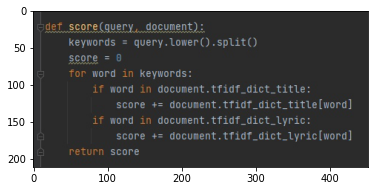

In [ ]:
plt.imshow(ims[1])
plt.show()

Стало:

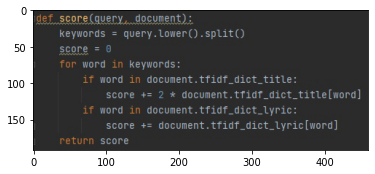

In [ ]:
plt.imshow(ims[3])
plt.show()

Выдача:

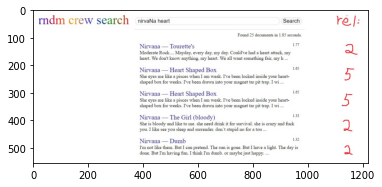

In [ ]:
plt.imshow(ims[2])
plt.show()

https://drive.google.com/file/d/19tKhRQ921Hk6dXwoVxbn2MLfQSArf0cV/view?usp=sharing

MRR@1 для этого случая = 1/2


MRR@2 = (1/2)*((1/2) + (1/3)) = 5/12

nDCG = 0.9156295968777747

Ничего не изменилось, выдача такая же, подправим вес слов из заголовка еще немного:

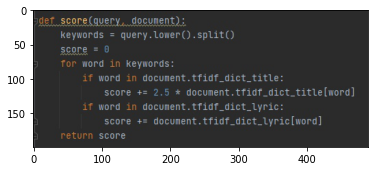

In [ ]:
plt.imshow(ims[5])
plt.show()

Выдача:

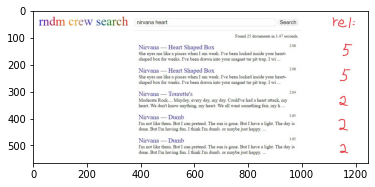

In [ ]:
plt.imshow(ims[4])
plt.show()

https://drive.google.com/file/d/1z6v00jlJVN7OYet4V3ooaCVKKKRQNpxh/view?usp=sharing

In [ ]:
ndcg_at_k([5, 5, 2, 2, 2], 5)

1.0

MRR@1 для этого случая = 1


MRR@2 = (1/2)*((1/1) + (1/2)) = 3/4

nDCG = 1

Наконец Heart Shaped Box стала первой в выдаче, как я и хотел, таким образом, мы подобрали функцию score